## Projeto: Ligações para o 911

Para este projeto estaremos analisando alguns dados de chamadas para o 911 do Kaggle. Este projeto também faz parte de uma atividade do curso: "Python para Data Science e Machine Learning". Os dados contém os seguintes campos:

    lat: Variável String, Latitude
    lng: Variável String, Longitude
    desc: Variável String, Descrição da Chamada de Emergência
    zip: Variável String, CEP
    título: Variável String, Título
    timeStamp: Variável String, AAAA-MM-DD HH: MM: SS
    twp: Variável String, Município
    addr: Variável String, Endereço
    e: Variável String, variável Dummy (sempre 1)


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('911.csv')
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


#### identificando a principal razão das chamadas

In [4]:
def func(col):
    return col.split(':')[0]

In [5]:
df['Razao'] = df['title'].apply(lambda x : func(x))

In [6]:
df['Razao'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Razao, dtype: int64

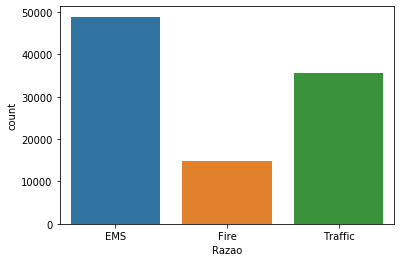

In [7]:
sns.countplot(df['Razao'])

*Percebemos que a principal razão das chamadas do 911 são EMS, ou seja, os serviçoes de emergência médica, como lesões e doenças que precisam de um atendimento médico urgente.* \
*Em segundo lugar, temos o atendimento a pessoas que sofreram acidentes no trânsito.* \
*E em terceiro, os incêndios*

#### Identificando as 5 principais subrazões das ligações

In [8]:
def func2(col):
    return col.split(':')[1]

In [9]:
df['SubRazao'] = df['title'].apply(lambda x : func2(x))

In [10]:
## Qtd de subrazões únicas
df['SubRazao'].nunique()

81

In [11]:
sub_razao = df['SubRazao'].value_counts().head()

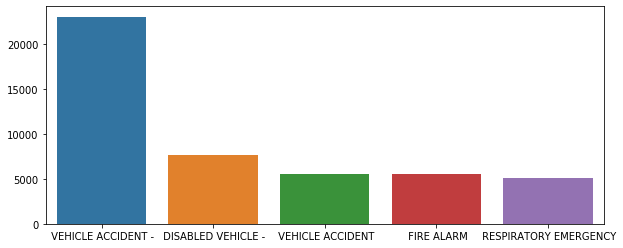

In [12]:
plt.figure(figsize=(10,4))
sns.barplot(sub_razao.index,sub_razao.values)

*Podemos perceber que a sub-razão mais frequente das chamadas é por acidente de veículo, com mais de 20000 ligações.*

#### Identificando os municípios com mais e menos ocorências

In [13]:
df['twp'].value_counts().head(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

In [14]:
top_twp = df['twp'].value_counts()[:5]

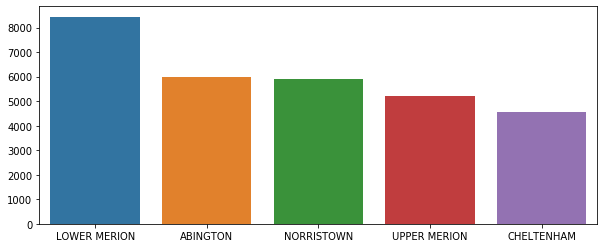

In [15]:
plt.figure(figsize=(10,4))
sns.barplot(top_twp.index,top_twp.values)

In [16]:
df['twp'].value_counts().sort_values().head(5)

LEHIGH COUNTY     30
PHILA COUNTY      43
GREEN LANE        51
SALFORD          163
BRYN ATHYN       173
Name: twp, dtype: int64

In [17]:
down_twp = df['twp'].value_counts().sort_values().head(5)

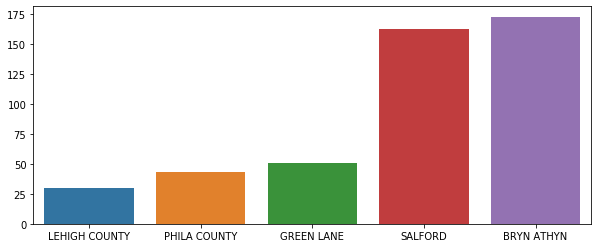

In [18]:
plt.figure(figsize=(10,4))
sns.barplot(down_twp.index,down_twp.values)

*O município com mais ocorrências é Lower Merion, com mais de 8000 chamadas.* \
*O município com menos ocorrências é Lehigh County, com pouco mais de 25 chamadas.*

#### Identificando os municípios com mais e menos ocorências por cada razão

In [19]:
twp_EMS = df[df['Razao'] == 'EMS']['twp'].value_counts()
twp_fire = df[df['Razao'] == 'Fire']['twp'].value_counts()
twp_traffic = df[df['Razao'] == 'Traffic']['twp'].value_counts()

In [20]:
## Ocorrências por EMS
twp_EMS.head()

NORRISTOWN      3858
LOWER MERION    3171
ABINGTON        3043
POTTSTOWN       2635
CHELTENHAM      2098
Name: twp, dtype: int64

In [21]:
## Ocorrências por fogo
twp_fire.head()

LOWER MERION    1548
ABINGTON         940
NORRISTOWN       777
CHELTENHAM       674
UPPER MERION     663
Name: twp, dtype: int64

In [22]:
## Ocorrências relacionadas as trânsito
twp_traffic.head()

LOWER MERION    3724
UPPER MERION    2499
ABINGTON        1994
CHELTENHAM      1803
PLYMOUTH        1442
Name: twp, dtype: int64

*O município com mais ocorrências por EMS é Norristown, com mais de 3800 chamadas. Totalizando cerca de 7.8%* \
*O município com mais ocorrências por Fogo é Lower Merion, com mais de 1500 chamadas. Totalizando cerca de 10.3%* \
*O município com mais ocorrências pelo tráfego é Lower Merion,, com mais de 3700 chamadas. Totalizando cerca de 10.4%*

#### Identificando os meses com maiores ocorrências do tipo EMS

In [23]:
## Precisamos conveter para data!!!
type(df['timeStamp'].iloc[1])

str

In [24]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [25]:
df['Mes'] = df['timeStamp'].apply(lambda x : x.month)

In [26]:
EMS = df[df['Razao'] == 'EMS']

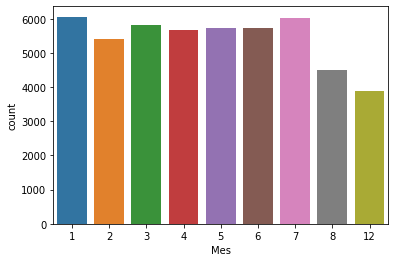

In [27]:
sns.countplot(EMS['Mes'])

*Aqui temos um fato interessante... Ou não teve nenhum atendimento entre setembro ou novembro relacionado a urgência médica, fato pouco provável, ou o mais comum, não foram disponibilizados, coletados os dados desses meses.*

#### Identificando os meses com maiores ocorrências por Fogo

In [28]:
fire = df[df['Razao'] == 'Fire']

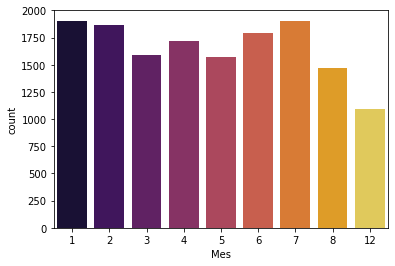

In [29]:
sns.countplot(fire['Mes'],palette='inferno')

*Aqui também percebemos o mesmo fato do anterior, o problema com os meses...* \
*Podemos ver também que os incêndios são mais frequentes em Janeiro, Fevereiro, Junho e Julho.*

#### Identificando os meses com maiores ocorrências relacionadas ao Transito

In [30]:
traffic = df[df['Razao'] == 'Traffic']

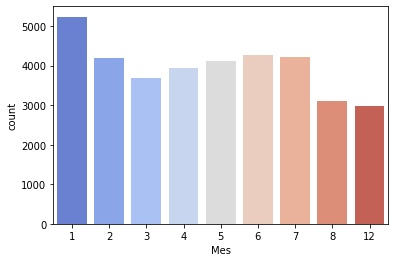

In [31]:
sns.countplot(traffic['Mes'],palette='coolwarm')

*Aqui também temos o mesmo problema dos dois tópicos anteriores, não possui registro de ocorrências entre setembro e novembro* \
*Podemos ver também que as chamadas relacionadas ao trânsito aumentam bastante em Janeiro. Uma hipótese seria porque normalmente nesse mês é período de férias, e as pessoas viajam e passeiam com mais frequência.*

#### Analisando a quantidade de cada razão em cada mês

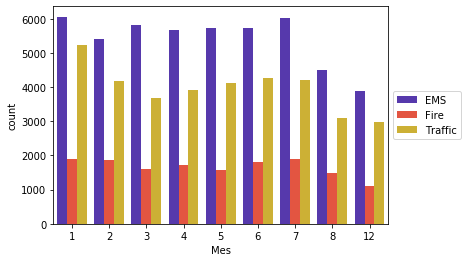

In [32]:
f = plt.figure()
sns.countplot(df['Mes'],hue=df['Razao'],palette='CMRmap')
plt.legend(loc='center left',bbox_to_anchor=(1,0.5))

*Podemos ver que o número de ocorrências em agosto e dezembro cai em todos os tipos.*

#### Identificando os dias da semana com maior ocorrência de cada tipo

In [33]:
## Mapeando os dias da semana
df['Dia da Semana'] = df['timeStamp'].apply(lambda x : x.dayofweek)

In [34]:
dias = {0:'Seg',1:'Ter',2:'Qua',3:'Qui',4:'Sex',5:'Sab',6:'Dom'}

In [35]:
df['Semana'] = df['Dia da Semana'].map(dias)

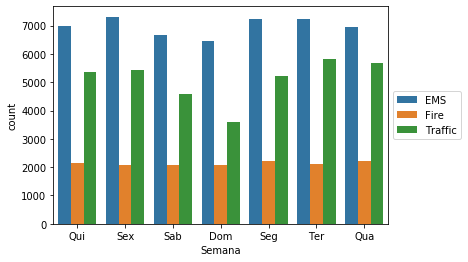

In [36]:
f = plt.figure()
sns.countplot(df['Semana'],hue=df['Razao'])
plt.legend(loc='center left',bbox_to_anchor=(1,0.5))

*Podemos ver que o número de ocorrências de fogo durante a semana não varia significativamente.*
*Vemos também que o número de ocorrências por tráfego reduz significativamente no domingo.*

#### Identificando correlação entre o dia da semana e o horário

In [37]:
df['Hora'] = df['timeStamp'].apply(lambda x : x.hour)

In [38]:
## Primeiro precisamos organizar o dataset
df2 = df.groupby(by=['Semana','Hora']).count()['twp'].unstack()

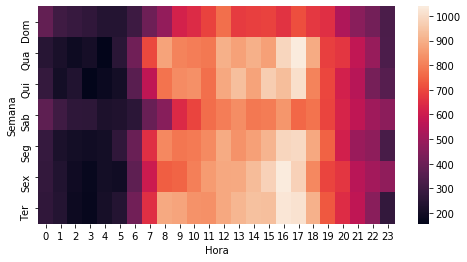

In [39]:
plt.figure(figsize=(8,4))
sns.heatmap(df2)

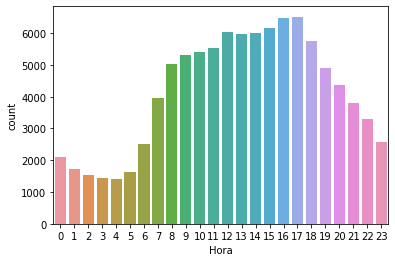

In [40]:
sns.countplot(df['Hora'])

*Percebemos que as ocorrências ocorrem principalmente entre as 8h e 19h durante a semana, e no final de semana entre 10h e 19h*
*Vale ressaltar que na semana o horário em que ocorre um maior número de ligações é entre 16h e 17h.*